In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics

import matplotlib.pyplot as plt

dataset = pd.read_csv('house_data _Small.csv')
# print(dataset)

x= dataset.drop(labels= ['id','date'], axis= 1)
y= dataset['price']
# print(x)
x.info()
x= x.drop(labels= 'price', axis= 1)

# Splitting the Dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.35, random_state= 101)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9999 non-null   float64
 1   bedrooms       9999 non-null   int64  
 2   bathrooms      9999 non-null   float64
 3   sqft_living    9999 non-null   int64  
 4   sqft_lot       9999 non-null   int64  
 5   floors         9999 non-null   float64
 6   waterfront     9999 non-null   int64  
 7   view           9999 non-null   int64  
 8   condition      9999 non-null   int64  
 9   grade          9999 non-null   int64  
 10  sqft_above     9999 non-null   int64  
 11  sqft_basement  9999 non-null   int64  
 12  yr_built       9999 non-null   int64  
 13  yr_renovated   9999 non-null   int64  
 14  zipcode        9999 non-null   int64  
 15  lat            9999 non-null   float64
 16  long           9999 non-null   float64
 17  sqft_living15  9999 non-null   int64  
 18  sqft_lot

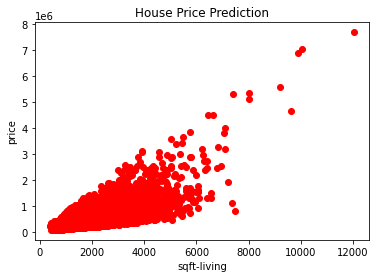

In [8]:
# Initial Data
def viz_init():
    tst=x.iloc[:,2]
    plt.scatter(tst, y, color='red')
    plt.title('House Price Prediction')
    plt.xlabel('sqft-living')
    plt.ylabel('price')  
    plt.show()
    return
viz_init()

Mean Absolute Error: 102291.75092547608
Mean Squared Error: 27524392344.7161
Mean Root Squared Error: 165904.7689028742


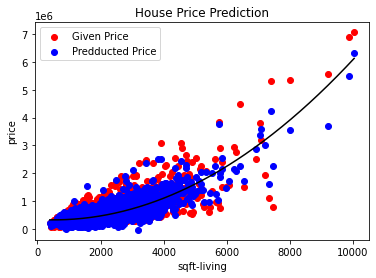

In [9]:
deg = 2

polyreg=make_pipeline(PolynomialFeatures(deg),LinearRegression())
polyreg.fit(x_train,y_train)
pred = polyreg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
# Visualizing the Polymonial Regression results
def viz_polymonial():
    tst=x_test.iloc[:,2]

    Xplo=x_test.iloc[:,2]
    plt.scatter(tst, y_test, color='red', label='Given Price')

    plt.scatter(tst,pred, color='blue', label='Predducted Price')
    plt.title('House Price Prediction')
    plt.xlabel('sqft-living')
    plt.ylabel('price')
    plt.legend()

    X_seq = np.linspace(Xplo.min(),Xplo.max(),300).reshape(-1,1)
    coefs = np.polyfit(Xplo.values.flatten(), y_test.values.flatten(), deg)
    
    plt.plot(X_seq, np.polyval(coefs, X_seq), color="black")
      
    plt.show()
    return
viz_polymonial()

In [10]:
df = pd.DataFrame({'Price':y_test, 'Predducted Price': pred})
df = pd.concat([x_test, df], axis= 1)
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price,Predducted Price
6676,4,2.00,1560,7569,1.5,0,0,4,7,1560,0,1966,0,98058,47.4496,-122.155,1480,8755,279000.0,3.459858e+05
6421,4,2.00,3140,10875,1.0,0,1,3,7,1940,1200,1939,1969,98199,47.6656,-122.406,3300,10080,775000.0,1.034122e+06
9968,3,2.25,1610,10454,1.0,0,0,3,7,1610,0,1977,0,98148,47.4517,-122.331,1720,9583,280000.0,3.129571e+05
8491,3,1.75,1600,7232,1.0,0,0,3,8,1600,0,1966,0,98008,47.6293,-122.121,1970,8120,453000.0,5.555147e+05
9981,3,1.00,3060,30166,1.0,0,0,5,8,3060,0,1959,0,98027,47.5656,-122.093,1880,19602,835000.0,6.364602e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,4,2.00,1360,2746,1.5,0,0,3,7,1360,0,1945,2011,98107,47.6736,-122.390,1960,2746,507000.0,5.014713e+05
7243,4,3.00,2800,7198,2.0,0,0,3,8,2800,0,2002,0,98038,47.3538,-122.013,3610,7845,444000.0,4.303632e+05
6483,4,1.75,1710,10440,1.0,0,0,4,7,1710,0,1955,0,98006,47.5756,-122.158,1480,10440,525000.0,5.258617e+05
9357,4,2.50,2370,10000,1.0,0,0,5,8,1660,710,1974,0,98052,47.6383,-122.099,2480,9875,715000.0,6.422722e+05
